In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import scipy
from scipy.interpolate import UnivariateSpline
from astropy.modeling import models, fitting
from tqdm import tqdm

def tie_stddevs(model):
    return model.stddev_0

def tie_stddevs3(model):
    return model.stddev_3

def tie_means(model):
    return model.mean_0

def tie_means3(model):
    return model.mean_3

def exp_tail(x, norm=1, mean=0, stddev=1, slope=1):
    return norm*np.exp(slope*(x-mean))*(1-scipy.stats.norm.cdf(x, mean, stddev))

def exp_tail_deriv(x, norm=1, mean=0, stddev=1, slope=1):
    return [
        np.exp(slope*(x-mean))*(1-scipy.stats.norm.cdf(x, mean, stddev)),
        norm*np.exp(slope*(x-mean) - (x - mean)**2 / stddev**2 * 0.5)/(stddev*np.sqrt(2*np.pi)) -\
            norm*slope*np.exp(slope*(x-mean))*(1-scipy.stats.norm.cdf(x, mean, stddev)),
        norm*(x-mean)*np.exp(slope*(x-mean) - (x - mean)**2 / stddev**2 * 0.5)/(stddev*stddev*np.sqrt(2*np.pi)),
        norm*(x-mean)*np.exp(slope*(x-mean))*(1-scipy.stats.norm.cdf(x, mean, stddev))
    ]

# ExpTail = models.custom_model(exp_tail, fit_deriv=exp_tail_deriv)
ExpTail = models.custom_model(exp_tail)

def const_shelf(x, norm=1, mean=0, stddev=1):
    return norm*(1-scipy.stats.norm.cdf(x, mean, stddev))

def const_shelf_deriv(x, norm=1, mean=0, stddev=1):
    return [
        (1-scipy.stats.norm.cdf(x, mean, stddev)),
        norm*np.exp(-0.5*(x-mean)**2 / stddev**2) / (np.sqrt(2*np.pi) * stddev),
        norm*(x-mean)*np.exp(-0.5*(x-mean)**2 / stddev**2) / (np.sqrt(2*np.pi) * stddev**2)
    ]

# ConstShelf = models.custom_model(const_shelf, fit_deriv=const_shelf_deriv)
ConstShelf = models.custom_model(const_shelf)

sns.set_context('paper', font_scale=1.5)
sns.set_palette('colorblind')

import nudetect
H119_dir = '/Volumes/Samsung_1TB/nustar_hybrids/detectorData/H119/'
plot_dir = H119_dir + 'figures/'
save_dir = H119_dir + 'data_products/'

GammaAm2415C500V
GammaEu1555C500V


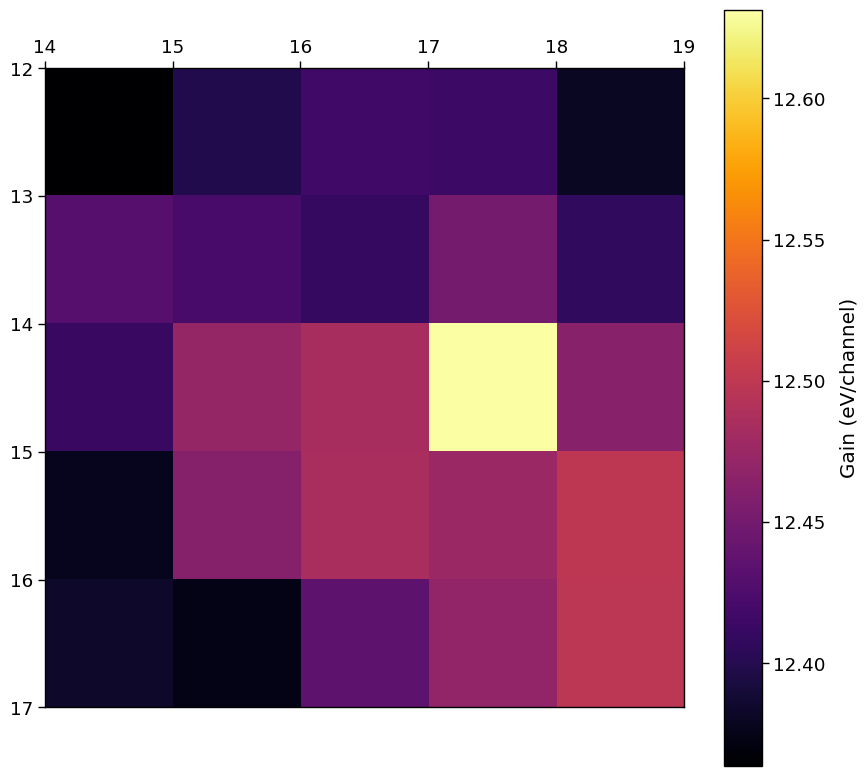

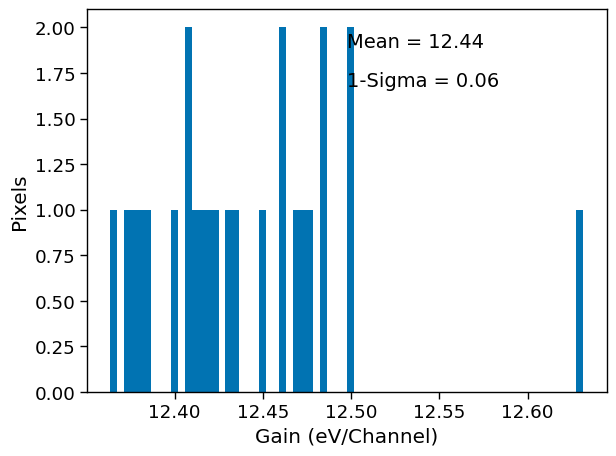

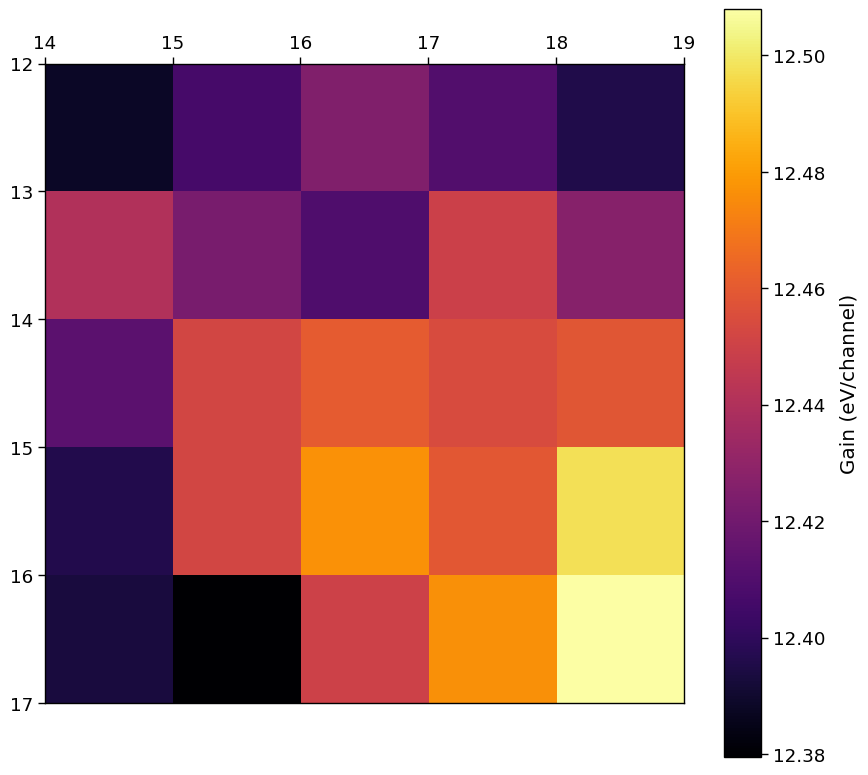

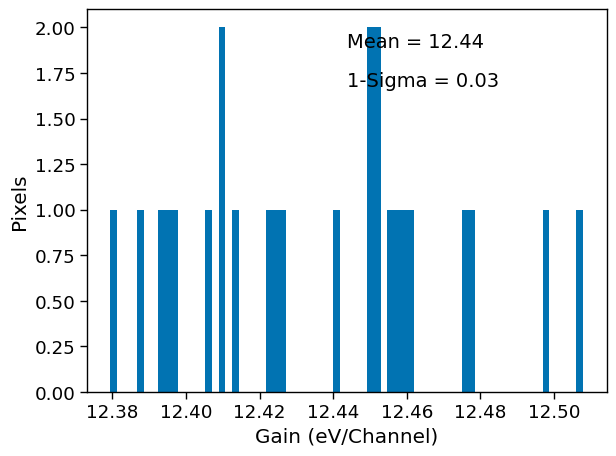

In [2]:
H119 = nudetect.Detector('H119', offset=np.zeros((32,32,16)))
Am241 = nudetect.Source('Am241')
Eu155 = nudetect.Source('Eu155')
Am241_flood = nudetect.GammaFlood(H119_dir + 'floodAm241_5C_-500V_20190815_small_region_capoffset_corrected.fits',\
                               'H119', Am241, 500, 5, data_dir=save_dir, plot_dir=plot_dir, region = [[14,12],[19,17]])
Eu155_flood = nudetect.GammaFlood(H119_dir + 'floodEu155_5C_-500V_20190816_small_region_capoffset_corrected.fits',\
                               'H119', Eu155, 500, 5, data_dir=save_dir, plot_dir=plot_dir, region = [[14,12],[19,17]])

Am241_flood = H119.add_experiment(Am241_flood)
Eu155_flood = H119.add_experiment(Eu155_flood)
H119.print_experiments()

full_gain = H119.gen_full_gain((Am241_flood, Eu155_flood))

In [5]:
print(full_gain)

[[0.01238026 0.01240426 0.01242236 0.0124117  0.01239116]
 [0.01243764 0.01242226 0.01240931 0.0124497  0.01242068]
 [0.01241307 0.01245826 0.01246801 0.0125104  0.01245983]
 [0.01239019 0.01245498 0.01247979 0.01246406 0.01249802]
 [0.01239043 0.01237779 0.01244531 0.01247428 0.01250482]]


# Depth plot and spectra without depth cut

In [3]:
grade_cut = 4
depth_cut = -0.01
am_spectrum, am_energies, am_depths = Am241_flood.gen_spectrum(gain=full_gain, sw_thresh=55, grade_cut=grade_cut, exclude_edges=True, depth_plot=True)
eu_spectrum, eu_energies, eu_depths = Eu155_flood.gen_spectrum(gain=full_gain, sw_thresh=55, grade_cut=grade_cut, exclude_edges=True, depth_plot=True)

print(len(am_energies) + len(eu_energies))
temp_mask = (am_energies < 15) & (am_energies > 12)
print(np.sum(temp_mask))
temp_mask = (am_energies < 61) & (am_energies > 58)
print(np.sum(temp_mask))
temp_mask = (eu_energies < 88) & (eu_energies > 83)
print(np.sum(temp_mask))
temp_mask = (eu_energies < 107) & (eu_energies > 103)
print(np.sum(temp_mask))

print(Am241_flood.gain)

Gain corrections have not yet been applied to the events. Correcting.
The SUBTH column has not yet been generated. Generating now using thresh=55


  0%|                                                     | 0/5 [00:00<?, ?it/s]/Users/sean/nudetect/nudetect.py:4646: RuntimeWarning: invalid value encountered in double_scalars
  ph_subth_list.append(keV_to_PI(np.sum(np.multiply(np.multiply(ph_subth_mask, pulse_tr_grid), gain_grid))/np.sum(ph_subth_mask)))
/Users/sean/nudetect/nudetect.py:4646: RuntimeWarning: invalid value encountered in multiply
  ph_subth_list.append(keV_to_PI(np.sum(np.multiply(np.multiply(ph_subth_mask, pulse_tr_grid), gain_grid))/np.sum(ph_subth_mask)))
/Users/sean/nudetect/nudetect.py:4648: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.raw_data_1d['PI'].loc[(row_mask) & (col_mask)] = pi_list
/Users/sean/nudetect/nudetect.py:4649: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

Grade based gain corrections have not yet been applied. Correcting.
The grade corrections have not yet been calculated. Calculating.


  0%|                                                     | 0/5 [00:00<?, ?it/s]/Users/sean/nudetect/nudetect.py:4692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.raw_data_1d['PI'].loc[(row_mask) & (col_mask) & (grade_mask)] = keV_to_PI(PI_to_keV(pulses)*temp_gain)
100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 60.00it/s]
/Users/sean/miniconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:214: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead.
  warnings.warn(


Gain corrections have not yet been applied to the events. Correcting.
The SUBTH column has not yet been generated. Generating now using thresh=55


  0%|                                                     | 0/5 [00:00<?, ?it/s]/Users/sean/nudetect/nudetect.py:4646: RuntimeWarning: invalid value encountered in double_scalars
  ph_subth_list.append(keV_to_PI(np.sum(np.multiply(np.multiply(ph_subth_mask, pulse_tr_grid), gain_grid))/np.sum(ph_subth_mask)))
/Users/sean/nudetect/nudetect.py:4646: RuntimeWarning: invalid value encountered in multiply
  ph_subth_list.append(keV_to_PI(np.sum(np.multiply(np.multiply(ph_subth_mask, pulse_tr_grid), gain_grid))/np.sum(ph_subth_mask)))
/Users/sean/nudetect/nudetect.py:4648: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.raw_data_1d['PI'].loc[(row_mask) & (col_mask)] = pi_list
/Users/sean/nudetect/nudetect.py:4649: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

Grade based gain corrections have not yet been applied. Correcting.
The grade corrections have not yet been calculated. Calculating.


  0%|                                                     | 0/5 [00:00<?, ?it/s]/Users/sean/nudetect/nudetect.py:4692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.raw_data_1d['PI'].loc[(row_mask) & (col_mask) & (grade_mask)] = keV_to_PI(PI_to_keV(pulses)*temp_gain)
100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 48.89it/s]

1099571
39937
120194
157023
83608
[[0.01238026 0.01240426 0.01242236 0.0124117  0.01239116]
 [0.01243764 0.01242226 0.01240931 0.0124497  0.01242068]
 [0.01241307 0.01245826 0.01246801 0.0125104  0.01245983]
 [0.01239019 0.01245498 0.01247979 0.01246406 0.01249802]
 [0.01239043 0.01237779 0.01244531 0.01247428 0.01250482]]



/Users/sean/miniconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:214: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead.
  warnings.warn(


In [5]:
print(Am241_flood.grade_gain)

{1: masked_array(
  data=[[1.00737729, 1.00841197, 1.01101896, 1.0107946 , 1.01095124],
        [1.00526426, 1.00949031, 1.01048134, 1.01308523, 1.00881725],
        [1.01526381, 1.01033853, 1.03036019, 1.03555725, 1.00429549],
        [1.00708522, 1.01188802, 1.01340716, 1.00199072, 1.00979517],
        [1.00376157, 1.0110092 , 1.0072831 , 1.01105548, 1.00467453]],
  mask=False,
  fill_value=0.0), 2: masked_array(
  data=[[1.00969886, 1.01203645, 1.01765232, 1.01020632, 1.00926274],
        [1.01416264, 1.01118962, 1.00511674, 1.00831917, 1.0114771 ],
        [1.01128223, 1.01343957, 1.00912028, 1.01590581, 1.01222426],
        [1.00870633, 1.01332242, 1.01080534, 1.01244781, 1.01375885],
        [1.00804323, 1.00618306, 1.0104436 , 1.01292293, 1.01268537]],
  mask=False,
  fill_value=0.0), 3: masked_array(
  data=[[1.00923319, 1.0127367 , 1.00718916, 1.0047987 , 1.00425785],
        [1.01290774, 1.01385986, 1.01262425, 1.00559573, 1.01115239],
        [1.00599532, 1.01381799, 1.01592

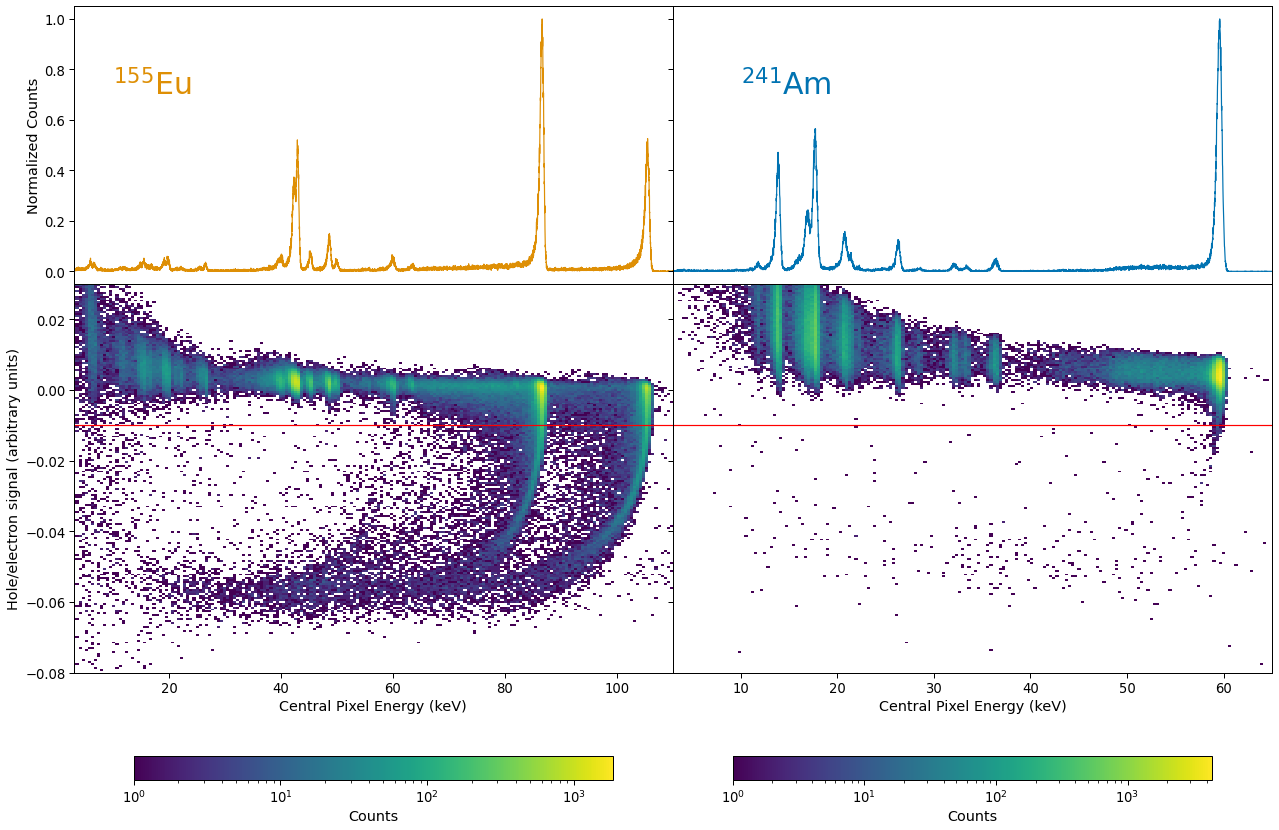

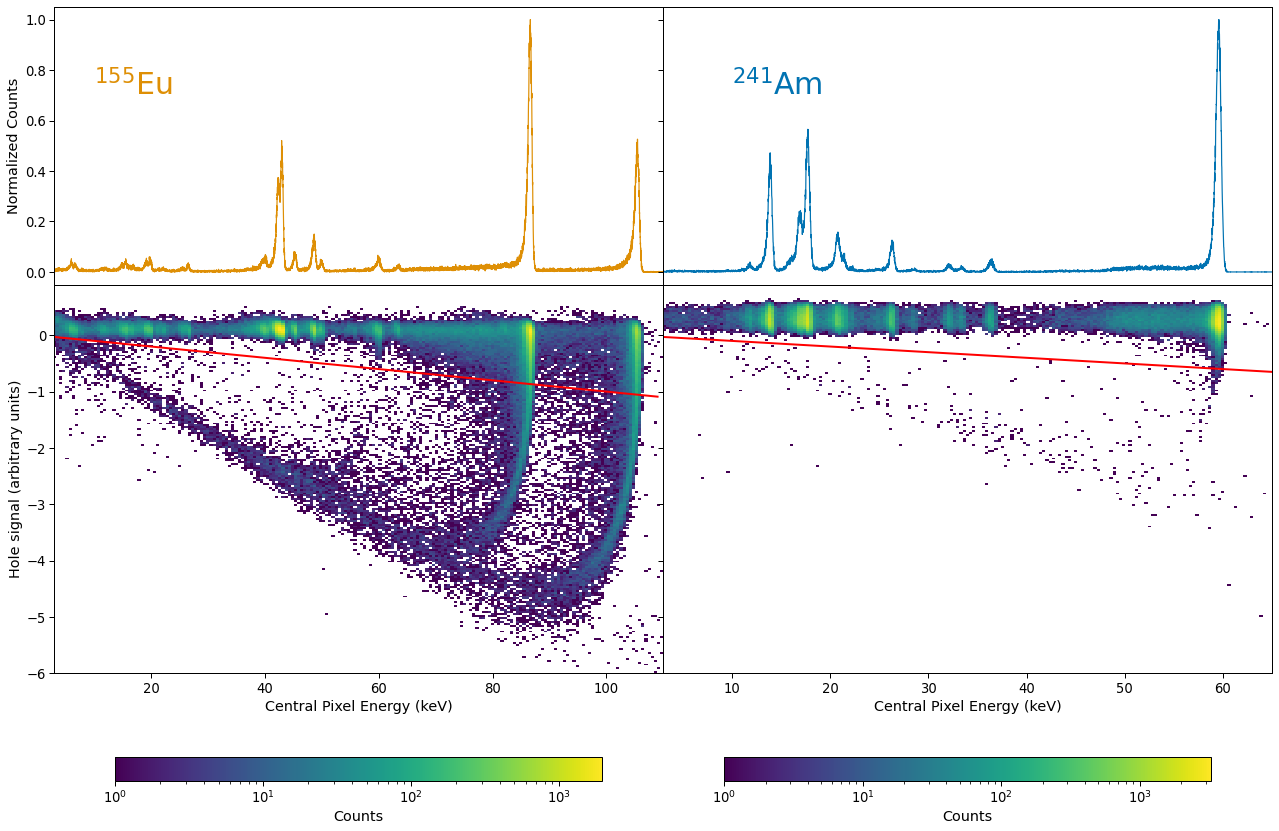

In [4]:
fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(figsize=(18,12), nrows=2, ncols=2, sharex='col', sharey='row', gridspec_kw={'hspace': 0, 'wspace':0, 'height_ratios': (1,2)})
ax1.plot(eu_spectrum[1], eu_spectrum[0]/np.max(eu_spectrum[0]), rasterized=True, color='C1')
ax1.text(10,0.7, r'$^{155}\mathrm{Eu}$', fontsize=30, color='C1')
_, _, _, eu_map = ax2.hist2d(eu_energies, eu_depths, bins = 200, range = ((0,110), (-0.08, 0.03)), norm=colors.LogNorm())
ax2.set_ylim(-0.08,0.025)
ax2.set_xlim(3,110)
ax2.axhline(depth_cut, color='red')
ax1.set_ylabel('Normalized Counts')
ax2.set_xlabel('Central Pixel Energy (keV)')
ax2.set_ylabel('Hole/electron signal (arbitrary units)')
# plt.show()
    
ax3.plot(am_spectrum[1], am_spectrum[0]/np.max(am_spectrum[0]), color='C0', rasterized=True)
ax3.text(10,0.7, r'$^{241}\mathrm{Am}$', fontsize=30, color='C0')
_, _, _, am_map = ax4.hist2d(am_energies, am_depths, bins = 200, range = ((0,65), (-0.08, 0.03)), norm=colors.LogNorm())
ax4.set_xlim(3,65)
ax4.axhline(depth_cut, color='red')
ax4.set_xlabel('Central Pixel Energy (keV)')
plt.colorbar(mappable=am_map, ax = ax2, orientation='horizontal', shrink = 0.8, label='Counts')
plt.colorbar(mappable=eu_map, ax = ax4, orientation='horizontal', shrink = 0.8, label='Counts')
plt.tight_layout()
plt.savefig(plot_dir + 'Eu155_Am241_calibrated_spec_depth_grade' + str(grade_cut) + '_noedges.pdf')

# Plot 
fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(figsize=(18,12), nrows=2, ncols=2, sharex='col', sharey='row', gridspec_kw={'hspace': 0, 'wspace':0, 'height_ratios': (1,2)})
ax1.plot(eu_spectrum[1], eu_spectrum[0]/np.max(eu_spectrum[0]), rasterized=True, color='C1')
ax1.text(10,0.7, r'$^{155}\mathrm{Eu}$', fontsize=30, color='C1')
_, _, _, eu_map = ax2.hist2d(eu_energies, eu_depths*eu_energies, bins = 200, range = ((0,110), (-6, 0.9)), norm=colors.LogNorm())
# ax2.set_ylim(-0.08,0.025)
ax2.set_xlim(3,110)
ax2.plot(depth_cut*np.arange(0,110), color='red', lw=2.0)
ax1.set_ylabel('Normalized Counts')
ax2.set_xlabel('Central Pixel Energy (keV)')
ax2.set_ylabel('Hole signal (arbitrary units)')
# plt.show()
    
ax3.plot(am_spectrum[1], am_spectrum[0]/np.max(am_spectrum[0]), color='C0', rasterized=True)
ax3.text(10,0.7, r'$^{241}\mathrm{Am}$', fontsize=30, color='C0')
_, _, _, am_map = ax4.hist2d(am_energies, am_depths*am_energies, bins = 200, range = ((0,65), (-6, 0.9)), norm=colors.LogNorm())
ax4.set_xlim(3,65)
ax4.plot(depth_cut*np.arange(0,110), color='red', lw=2.0)
ax4.set_xlabel('Central Pixel Energy (keV)')
plt.colorbar(mappable=am_map, ax = ax2, orientation='horizontal', shrink = 0.8, label='Counts')
plt.colorbar(mappable=eu_map, ax = ax4, orientation='horizontal', shrink = 0.8, label='Counts')
plt.tight_layout()
plt.savefig(plot_dir + 'Eu155_Am241_calibrated_spec_depth_grade' + str(grade_cut) + '_noedges_holeonly.pdf')

In [5]:
plt.ion()
plt.figure(figsize = (9,6))
plt.plot(am_spectrum[1], am_spectrum[0]/np.max(am_spectrum[0]), label=r'$^{241}\mathrm{Am}$')
plt.plot(eu_spectrum[1], eu_spectrum[0]/np.max(eu_spectrum[0]), label=r'$^{155}\mathrm{Eu}$')
plt.xlabel('Energy (keV)')
plt.ylabel('Normalized Counts')
plt.legend()
plt.xlim(0.0,110.)
plt.tight_layout()
plt.savefig(plot_dir + 'Eu155_Am241_calibrated_spec_offset_grade' + str(grade_cut) + '_noedges.pdf')
plt.close()
# plt.ylim(0,600) 

no_depth_spec_norm = (eu_spectrum[0]/np.max(eu_spectrum[0])) + (am_spectrum[0]/np.max(am_spectrum[0]))

## Line fitting

In [6]:
if grade_cut==0:
    ylimits = (1, 2000)
else:
    ylimits = (10, 4000)

### Eu155 86keV

[86.2028107  86.96107062]


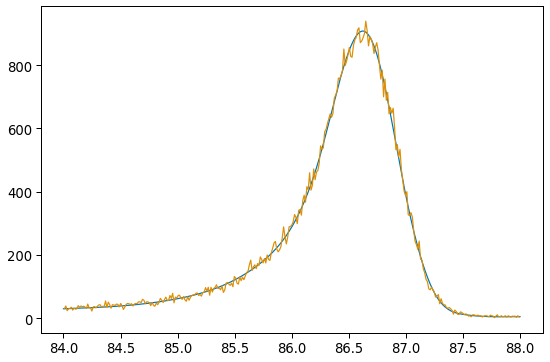

FWHM: 0.7582599274473267
[4.17523492e+02 8.66787815e+01 2.60385136e-01 1.97583590e+01
 8.66787815e+01 2.60385136e-01 9.22069517e+02 8.66787815e+01
 2.60385136e-01 1.91618163e+00 5.09509849e+00]


100%|███████████████████████████████████████| 1000/1000 [34:01<00:00,  2.04s/it]

0.7664080003221709
0.0057554816438531164
86.68372991388567
0.006219979811167995


In [7]:
if grade_cut==0:
    upper=89
    lower=83
else:
    upper=87.2
    lower=83

fit_mask = (eu_spectrum[1] < upper) & (eu_spectrum[1] > lower)

line_init = models.Gaussian1D(amplitude=1600, mean=86.8, stddev=0.4) + ConstShelf(norm=60, mean=86.8, stddev=0.4) + \
    ExpTail(norm=1000, mean=86.8, stddev=0.4, slope=1.5) + models.Const1D(amplitude=20)

# line_init.amplitude_0.min = 0
line_init.stddev_1.tied=tie_stddevs
line_init.mean_1.tied = tie_means
# line_init.norm_1.min = 0
# line_init.norm_1.max = None
line_init.stddev_2.tied=tie_stddevs
line_init.mean_2.tied = tie_means
# line_init.norm_2.min = 0
# line_init.norm_2.max = None

fit_line = fitting.LevMarLSQFitter(calc_uncertainties=True)
line = fit_line(line_init, eu_spectrum[1][fit_mask], eu_spectrum[0][fit_mask], weights = 1.0/np.sqrt(eu_spectrum[0][fit_mask]))

xs = np.linspace(84, 88, int(1e6))
spline = UnivariateSpline(xs, line(xs) - line.parameters[-1] - line(xs).max()/2)
# spline = UnivariateSpline(xs, line(xs) - line(xs).max()/2)
roots = spline.roots() # find the roots
print(roots)

fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize=(9,8), sharex=True, gridspec_kw={'hspace':0, 'height_ratios': [2,1]})
ax1.errorbar(eu_spectrum[1][fit_mask], eu_spectrum[0][fit_mask], yerr=np.sqrt(eu_spectrum[0][fit_mask]), fmt='', ls='')
ax1.plot(eu_spectrum[1][fit_mask], line(eu_spectrum[1][fit_mask]))

ax1.plot(eu_spectrum[1][fit_mask], line[0](eu_spectrum[1][fit_mask]), ls='dashed')
ax1.plot(eu_spectrum[1][fit_mask], line[1](eu_spectrum[1][fit_mask]), ls='dashed')
ax1.plot(eu_spectrum[1][fit_mask], line[2](eu_spectrum[1][fit_mask]), ls='dashed')
ax1.plot(eu_spectrum[1][fit_mask], line[3](eu_spectrum[1][fit_mask]), ls='dashed')
ax1.set_yscale('log')
ax1.set_ylim(ylimits)
ax1.set_ylabel('Counts')
ax1.set_xlabel('Energy (keV)')
ax1.text(lower, ylimits[1]/2, r'Source: $^{155}$Eu')
ax1.text(lower, ylimits[1]/4, 'Centroid = ' + str(round(line.parameters[1], 1)) + ' keV')
ax1.text(lower, ylimits[1]/8, 'FWHM = ' + str(int(1000*(roots[1] - roots[0]))) + r'$\pm 6$' + ' eV')
ax1.plot(roots, [line.parameters[-1] + line(xs).max()/2, line.parameters[-1] + line(xs).max()/2], zorder=0, color='black')


ax2.errorbar(eu_spectrum[1][fit_mask], (eu_spectrum[0][fit_mask] - line(eu_spectrum[1][fit_mask]))/np.sqrt(eu_spectrum[0][fit_mask]),
             yerr=1.0, fmt='', ls='')
ax2.axhline(0, color='C1')
ax2.set_ylim((-5,5))
ax2.set_xlabel('Energy (keV)')
ax2.set_ylabel(r'$\chi$')
plt.savefig(plot_dir + 'Eu155_86kev_fit_grade' + str(grade_cut) + '.pdf')
plt.close()


plt.figure(figsize=(9,6))
plt.plot(xs, spline(xs)+line(xs).max()/2 + line.parameters[-1])
plt.plot(eu_spectrum[1][np.abs(eu_spectrum[1] - 86) < 2],
         eu_spectrum[0][np.abs(eu_spectrum[1] - 86) < 2])
plt.show()
plt.close()
del xs, spline
print('FWHM: ' + str(roots[1] - roots[0]))

print(line.parameters)
# print(np.sqrt(np.diag(fit_line.fit_info['param_cov'])))
# print(fit_line.fit_info.keys())
# print(line)
# print(np.sqrt(np.diag(line.cov_matrix.cov_matrix)))

# rand_param = np.random.multivariate_normal(line.parameters, line.cov_matrix.cov_matrix, size = 10000)

line_init = models.Gaussian1D(amplitude=420, mean=86.8, stddev=0.26) + ConstShelf(norm=20, mean=86.8, stddev=0.26) + \
ExpTail(norm=922, mean=86.8, stddev=0.26, slope=1.9) + models.Const1D(amplitude=5)

# line_init.amplitude_0.min = 0
line_init.stddev_1.tied=tie_stddevs
line_init.mean_1.tied = tie_means
# line_init.norm_1.min = 0
# line_init.norm_1.max = None
line_init.stddev_2.tied=tie_stddevs
line_init.mean_2.tied = tie_means
# line_init.norm_2.min = 0
# line_init.norm_2.max = None

fwhm_sample = []
centroid_sample = []
fake_spec = np.random.poisson(lam=eu_spectrum[0][fit_mask], size = (1000, len(eu_spectrum[0][fit_mask])))
for s in tqdm(fake_spec):

    fit_line = fitting.LevMarLSQFitter()
    line = fit_line(line_init, eu_spectrum[1][fit_mask], s)

    xs = np.linspace(84, 88, int(1e6))
    spline = UnivariateSpline(xs, line(xs) - line.parameters[-1] - line(xs).max()/2)
    # spline = UnivariateSpline(xs, line(xs) - line(xs).max()/2)
    roots = spline.roots() # find the roots

    fwhm_sample.append(roots[1] - roots[0])
    centroid_sample.append(line.parameters[1])
    
print(np.mean(fwhm_sample))
print(np.std(fwhm_sample))
print(np.mean(centroid_sample))
print(np.std(centroid_sample))


### Eu155 105keV

/var/folders/bs/3q1_zdjn6b59l3mxccjw3wmm0000gn/T/ipykernel_69906/3562353952.py:51: RuntimeWarning: divide by zero encountered in true_divide
  ax2.errorbar(eu_spectrum[1][fit_mask], (eu_spectrum[0][fit_mask] - line(eu_spectrum[1][fit_mask]))/np.sqrt(eu_spectrum[0][fit_mask]),
/var/folders/bs/3q1_zdjn6b59l3mxccjw3wmm0000gn/T/ipykernel_69906/3562353952.py:60: RuntimeWarning: divide by zero encountered in true_divide
  chisq_red = np.sum(((eu_spectrum[0][fit_mask] - line(eu_spectrum[1][fit_mask])) ** 2)/\


inf
0.8813363208413847
[1.79278075e+02 1.05532614e+02 2.82558427e-01 2.29296320e+01
 1.05532614e+02 2.82558427e-01 5.11807274e+02 1.05532614e+02
 2.82558427e-01 1.72110574e+00]
[[ 8.78637625e+02 -1.60408948e-01  1.45974754e-01 -7.84485788e+01
  -1.58995260e+03 -3.72507335e+00]
 [-1.60408948e-01  5.49589201e-05 -3.79314005e-05  7.78544961e-03
   2.91135306e-01  5.08347326e-04]
 [ 1.45974754e-01 -3.79314005e-05  3.37679280e-05 -1.11647899e-02
  -2.68645886e-01 -5.67620754e-04]
 [-7.84485788e+01  7.78544961e-03 -1.11647899e-02  1.21261050e+01
   1.40609318e+02  4.14882717e-01]
 [-1.58995260e+03  2.91135306e-01 -2.68645886e-01  1.40609318e+02
   2.89466611e+03  6.76812431e+00]
 [-3.72507335e+00  5.08347326e-04 -5.67620754e-04  4.14882717e-01
   6.76812431e+00  1.76433184e-02]]


100%|███████████████████████████████████████| 1000/1000 [28:43<00:00,  1.72s/it]

0.87500774138051
0.00886774995394361
105.53175617399614
0.013037987976252951


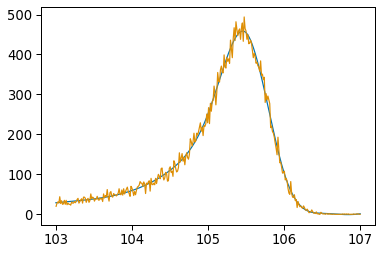

In [8]:
if grade_cut==0:
    upper=106.5
    lower=103

else:
    upper=106
    lower=103

fit_mask = (eu_spectrum[1] < upper) & (eu_spectrum[1] > lower)

line_init = models.Gaussian1D(amplitude=250, mean=105, stddev=0.2) + ConstShelf(norm=0.1, mean=105, stddev=0.4) + \
        ExpTail(norm=100, mean=105, stddev=0.4, slope=.1)# + models.Const1D(amplitude=20)


# line_init.amplitude_0.min = 0
line_init.stddev_1.tied=tie_stddevs
line_init.mean_1.tied = tie_means
# line_init.norm_1.min = 0
# line_init.norm_1.max = None
line_init.stddev_2.tied=tie_stddevs
line_init.mean_2.tied = tie_means
# line_init.norm_2.min = 0
# line_init.norm_2.max = None


fit_line = fitting.LevMarLSQFitter(calc_uncertainties=True)
line = fit_line(line_init, eu_spectrum[1][fit_mask], eu_spectrum[0][fit_mask])

xs = np.linspace(103, 107, int(1e6))
spline = UnivariateSpline(xs,
                          line(xs) - line(xs).max()/2)
roots = spline.roots() # find the roots

fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize=(9,8), sharex=True, gridspec_kw={'hspace':0, 'height_ratios': [2,1]})
ax1.errorbar(eu_spectrum[1][fit_mask], eu_spectrum[0][fit_mask], yerr=np.sqrt(eu_spectrum[0][fit_mask]), fmt='', ls='')
ax1.plot(eu_spectrum[1][fit_mask], line(eu_spectrum[1][fit_mask]))

ax1.plot(eu_spectrum[1][fit_mask], line[0](eu_spectrum[1][fit_mask]), ls='dashed')
ax1.plot(eu_spectrum[1][fit_mask], line[1](eu_spectrum[1][fit_mask]), ls='dashed')
ax1.plot(eu_spectrum[1][fit_mask], line[2](eu_spectrum[1][fit_mask]), ls='dashed')
ax1.set_yscale('log')
ax1.set_ylim(ylimits)
ax1.set_ylabel('Counts')
ax1.set_xlabel('Energy (keV)')
ax1.text(lower, ylimits[1]/2, r'Source: $^{155}$Eu')
ax1.text(lower, ylimits[1]/4, 'Centroid = ' + str(round(line.parameters[1], 1)) + ' keV')
ax1.text(lower, ylimits[1]/8, 'FWHM = ' + str(int(1000*(roots[1] - roots[0]))) + r'$\pm 9$' + ' eV')
ax1.plot(roots, [line(xs).max()/2, line(xs).max()/2], zorder=0, color='black')


ax2.errorbar(eu_spectrum[1][fit_mask], (eu_spectrum[0][fit_mask] - line(eu_spectrum[1][fit_mask]))/np.sqrt(eu_spectrum[0][fit_mask]),
             yerr=1.0, fmt='', ls='')
ax2.axhline(0, color='C1')
ax2.set_ylim((-5,5))
ax2.set_xlabel('Energy (keV)')
ax2.set_ylabel(r'$\chi$')
plt.savefig(plot_dir + 'Eu155_105kev_fit_grade' + str(grade_cut) + '.pdf')
plt.close()

chisq_red = np.sum(((eu_spectrum[0][fit_mask] - line(eu_spectrum[1][fit_mask])) ** 2)/\
                   eu_spectrum[0][fit_mask])/len(eu_spectrum[0][fit_mask] - 7)
print(chisq_red)


plt.plot(xs, spline(xs)+line(xs).max()/2)
plt.plot(eu_spectrum[1][np.abs(eu_spectrum[1] - 105) < 2],
         eu_spectrum[0][np.abs(eu_spectrum[1] - 105) < 2])
del xs, spline
print(roots[1] - roots[0])
print(line.parameters)
print(fit_line.fit_info['param_cov'])

fwhm_sample = []
centroid_sample = []
fake_spec = np.random.poisson(lam=eu_spectrum[0][fit_mask], size = (1000, len(eu_spectrum[0][fit_mask])))
for s in tqdm(fake_spec):

    fit_line = fitting.LevMarLSQFitter()
    line = fit_line(line_init, eu_spectrum[1][fit_mask], s)

    xs = np.linspace(103, 107, int(1e6))
    spline = UnivariateSpline(xs, line(xs) - line.parameters[-1] - line(xs).max()/2)
    # spline = UnivariateSpline(xs, line(xs) - line(xs).max()/2)
    roots = spline.roots() # find the roots

    fwhm_sample.append(roots[1] - roots[0])
    centroid_sample.append(line.parameters[1])
    
print(np.mean(fwhm_sample))
print(np.std(fwhm_sample))
print(np.mean(centroid_sample))
print(np.std(centroid_sample))


### Am241 59.5keV

/var/folders/bs/3q1_zdjn6b59l3mxccjw3wmm0000gn/T/ipykernel_69906/1396545277.py:47: RuntimeWarning: divide by zero encountered in true_divide
  ax2.errorbar(am_spectrum[1][fit_mask], (am_spectrum[0][fit_mask] - line(am_spectrum[1][fit_mask]))/np.sqrt(am_spectrum[0][fit_mask]),


0.6286661373268458
[1.22865491e+02 5.95558619e+01 2.12452946e-01 2.09065633e+01
 5.95558619e+01 2.12452946e-01 1.54780732e+03 5.95558619e+01
 2.12452946e-01 3.87194457e+00]
[[ 4.69570012e+03  6.30962012e-01  1.55174904e-01 -1.51916107e+02
  -8.97637930e+03 -1.47144324e+01]
 [ 6.30962012e-01  1.29810581e-04  1.24844100e-05 -3.17760535e-02
  -1.18186739e+00 -2.50883079e-03]
 [ 1.55174904e-01  1.24844100e-05  7.53102168e-06 -3.70111247e-03
  -3.03597650e-01 -4.06196056e-04]
 [-1.51916107e+02 -3.17760535e-02 -3.70111247e-03  1.21448600e+01
   2.81475591e+02  6.48323577e-01]
 [-8.97637930e+03 -1.18186739e+00 -3.03597650e-01  2.81475591e+02
   1.72074742e+04  2.78753224e+01]
 [-1.47144324e+01 -2.50883079e-03 -4.06196056e-04  6.48323577e-01
   2.78753224e+01  5.31134058e-02]]


100%|█████████████████████████████████████| 1000/1000 [34:59<00:00,  2.10s/it]


0.6284490319272494
0.004678381474235894
59.55477098472718
0.011963085776614993


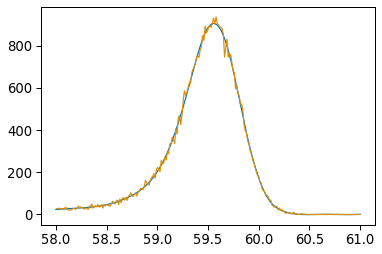

In [9]:
if grade_cut==0:
    upper= 60.5
    lower= 58
else:
    upper= 60
    lower= 58

fit_mask = (am_spectrum[1] < upper) & (am_spectrum[1] > lower)

line_init = models.Gaussian1D(amplitude=150, mean=59.6, stddev=0.22) + ConstShelf(norm=11, mean=59.5, stddev=0.2) + \
    ExpTail(norm=920, mean=59.5, stddev=0.2, slope=3.7)# + models.Const1D(amplitude=20)

# line_init = models.Gaussian1D(amplitude=500, mean=59.5, stddev=0.2) + ConstShelf(norm=10, mean=59.5, stddev=0.2)


line_init.stddev_1.tied=tie_stddevs
line_init.mean_1.tied = tie_means
line_init.stddev_2.tied=tie_stddevs
line_init.mean_2.tied = tie_means

fit_line = fitting.LevMarLSQFitter()
line = fit_line(line_init, am_spectrum[1][fit_mask], am_spectrum[0][fit_mask])

xs = np.linspace(58, 61, int(1e6))
spline = UnivariateSpline(xs,
                          line(xs) - line(xs).max()/2)
roots = spline.roots() # find the roots

fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize=(9,8), sharex=True, gridspec_kw={'hspace':0, 'height_ratios': [2,1]})
ax1.errorbar(am_spectrum[1][fit_mask], am_spectrum[0][fit_mask], yerr=np.sqrt(am_spectrum[0][fit_mask]), fmt='', ls='')
ax1.plot(am_spectrum[1][fit_mask], line(am_spectrum[1][fit_mask]))

ax1.plot(am_spectrum[1][fit_mask], line[0](am_spectrum[1][fit_mask]), ls='dashed')
ax1.plot(am_spectrum[1][fit_mask], line[1](am_spectrum[1][fit_mask]), ls='dashed')
ax1.plot(am_spectrum[1][fit_mask], line[2](am_spectrum[1][fit_mask]), ls='dashed')
ax1.set_yscale('log')
ax1.set_ylim(ylimits)
ax1.set_ylabel('Counts')
ax1.set_xlabel('Energy (keV)')
ax1.text(lower, ylimits[1]/2, r'Source: $^{241}$Am')
ax1.text(lower, ylimits[1]/4, 'Centroid = ' + str(round(line.parameters[1], 1)) + ' keV')
ax1.text(lower, ylimits[1]/8, 'FWHM = ' + str(int(1000*(roots[1] - roots[0]))) + r'$\pm 5$' + ' eV')
ax1.plot(roots, [line(xs).max()/2, line(xs).max()/2], zorder=0, color='black')



ax2.errorbar(am_spectrum[1][fit_mask], (am_spectrum[0][fit_mask] - line(am_spectrum[1][fit_mask]))/np.sqrt(am_spectrum[0][fit_mask]),
             yerr=1.0, fmt='', ls='')
ax2.axhline(0, color='C1')
ax2.set_ylim((-5,5))
ax2.set_xlabel('Energy (keV)')
ax2.set_ylabel(r'$\chi$')
plt.savefig(plot_dir + 'Am241_60kev_fit_grade' + str(grade_cut) + '.pdf')
plt.close()


# chisq_red = np.sum(((am_spectrum[0][lower:upper][zero_mask] - line(am_spectrum[1][lower:upper][zero_mask])) ** 2)/\
#                    am_spectrum[0][lower:upper][zero_mask])/len(am_spectrum[0][lower:upper][zero_mask] - 7)
# print(chisq_red)


plt.plot(xs, spline(xs)+line(xs).max()/2)
plt.plot(am_spectrum[1][np.abs(am_spectrum[1] - 59.5) < 1.5],
         am_spectrum[0][np.abs(am_spectrum[1] - 59.5) < 1.5])
del xs, spline
print(roots[1] - roots[0])
print(line.parameters)
print(fit_line.fit_info['param_cov'])

fwhm_sample = []
centroid_sample = []
fake_spec = np.random.poisson(lam=am_spectrum[0][fit_mask], size = (1000, len(am_spectrum[0][fit_mask])))
for s in tqdm(fake_spec):

    fit_line = fitting.LevMarLSQFitter()
    line = fit_line(line_init, am_spectrum[1][fit_mask], s)

    xs = np.linspace(58, 61, int(1e6))
    spline = UnivariateSpline(xs, line(xs) - line(xs).max()/2)
    # spline = UnivariateSpline(xs, line(xs) - line(xs).max()/2)
    roots = spline.roots() # find the roots

    fwhm_sample.append(roots[1] - roots[0])
    centroid_sample.append(line.parameters[1])
    
print(np.mean(fwhm_sample))
print(np.std(fwhm_sample))
print(np.mean(centroid_sample))
print(np.std(centroid_sample))





### Am241 14keV

1.169006881096636
0.45189889298681685
[2.11378516e+02 1.39229551e+01 1.64564889e-01 3.75733621e+02
 1.39229551e+01 1.64564889e-01 3.15387404e+00 8.54326283e+00]
[[ 5.97566364e+02 -5.34698249e-02  6.73998218e-02 -1.13776063e+03
  -5.17163992e+00 -1.58391563e+01]
 [-5.34698249e-02  1.14639676e-05 -8.44721151e-06  1.03790768e-01
   3.32078534e-04  3.18526077e-04]
 [ 6.73998218e-02 -8.44721151e-06  1.08860133e-05 -1.32096588e-01
  -5.71653087e-04 -2.09431333e-03]
 [-1.13776063e+03  1.03790768e-01 -1.32096588e-01  2.18839116e+03
   9.91075823e+00  2.88592386e+01]
 [-5.17163992e+00  3.32078534e-04 -5.71653087e-04  9.91075823e+00
   4.95948345e-02  1.81232934e-01]
 [-1.58391563e+01  3.18526077e-04 -2.09431333e-03  2.88592386e+01
   1.81232934e-01  1.68618489e+00]]


100%|█████████████████████████████████████| 1000/1000 [30:24<00:00,  1.82s/it]


0.45220267830511857
0.005681991099908506
13.923314986710976
0.005036742029814821


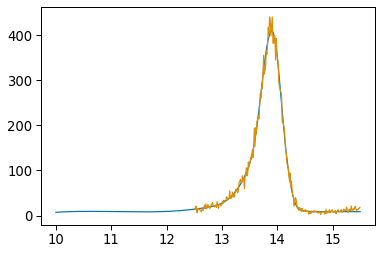

In [10]:
if grade_cut==0:
    upper = 15
    lower = 12.5
else:
    upper = 14.25
    lower = 12.5

fit_mask = (am_spectrum[1] < upper) & (am_spectrum[1] > lower)

# line_init = models.Gaussian1D(amplitude=250, mean=13.9, stddev=0.3) + ConstShelf(norm=1, mean=13.9, stddev=0.2) + models.Const1D(amplitude=20)

line_init = models.Gaussian1D(amplitude=400, mean=13.9, stddev=0.2) + \
    ExpTail(norm=250, mean=13.9, stddev=0.2, slope=3.6) + models.Const1D(amplitude=10)

line_init.stddev_1.tied=tie_stddevs
line_init.mean_1.tied = tie_means


fit_line = fitting.LevMarLSQFitter(calc_uncertainties=True)
line = fit_line(line_init, am_spectrum[1][fit_mask], am_spectrum[0][fit_mask])


xs = np.linspace(10, 15.5, int(1e6))
spline = UnivariateSpline(xs,
                          line(xs) - line(xs).max()/2 - line.parameters[-1])
roots = spline.roots() # find the roots


fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize=(9,8), sharex=True, gridspec_kw={'hspace':0, 'height_ratios': [2,1]})
ax1.errorbar(am_spectrum[1][fit_mask], am_spectrum[0][fit_mask], yerr=np.sqrt(am_spectrum[0][fit_mask]), fmt='', ls='')
ax1.plot(am_spectrum[1][fit_mask], line(am_spectrum[1][fit_mask]))

ax1.plot(am_spectrum[1][fit_mask], line[0](am_spectrum[1][fit_mask]), ls='dashed')
ax1.plot(am_spectrum[1][fit_mask], line[1](am_spectrum[1][fit_mask]), ls='dashed')
ax1.plot(am_spectrum[1][fit_mask], line[2](am_spectrum[1][fit_mask]), ls='dashed')
ax1.set_yscale('log')
ax1.set_ylim(ylimits)
ax1.set_ylabel('Counts')
ax1.set_xlabel('Energy (keV)')
ax1.text(lower, ylimits[1]/2, r'Source: $^{241}$Am')
ax1.text(lower, ylimits[1]/4, 'Centroid = ' + str(round(line.parameters[1], 1)) + ' keV')
ax1.text(lower, ylimits[1]/8, 'FWHM = ' + str(int(1000*(roots[1] - roots[0]))) + r'$\pm 6$' + ' eV')
ax1.plot(roots, [line(xs).max()/2 + line.parameters[-1], line(xs).max()/2 + line.parameters[-1]], zorder=0, color='black')



ax2.errorbar(am_spectrum[1][fit_mask], (am_spectrum[0][fit_mask] - line(am_spectrum[1][fit_mask]))/np.sqrt(am_spectrum[0][fit_mask]),
             yerr=1.0, fmt='', ls='')
ax2.axhline(0, color='C1')
ax2.set_ylim((-5,5))
ax2.set_xlabel('Energy (keV)')
ax2.set_ylabel(r'$\chi$')
plt.savefig(plot_dir + 'Am241_14kev_fit_grade' + str(grade_cut) + '.pdf')
plt.close()

chisq_red = np.sum(((am_spectrum[0][fit_mask] - line(am_spectrum[1][fit_mask])) ** 2)/\
                   am_spectrum[0][fit_mask])/len(am_spectrum[0][fit_mask] - 7)
print(chisq_red)

xs = np.linspace(10, 15.5, int(1e6))
spline = UnivariateSpline(xs,
                          line(xs) - line(xs).max()/2 - line.parameters[-1])
roots = spline.roots() # find the roots
plt.plot(xs, spline(xs)+line(xs).max()/2 + line.parameters[-1])
plt.plot(am_spectrum[1][np.abs(am_spectrum[1] - 14) < 1.5],
         am_spectrum[0][np.abs(am_spectrum[1] - 14) < 1.5])
del xs, spline
print(roots[1] - roots[0])
print(line.parameters)
print(fit_line.fit_info['param_cov'])

fwhm_sample = []
centroid_sample = []
fake_spec = np.random.poisson(lam=am_spectrum[0][fit_mask], size = (1000, len(am_spectrum[0][fit_mask])))
for s in tqdm(fake_spec):

    fit_line = fitting.LevMarLSQFitter()
    line = fit_line(line_init, am_spectrum[1][fit_mask], s)

    xs = np.linspace(10, 15.5, int(1e6))
    spline = UnivariateSpline(xs, line(xs) - line.parameters[-1] - line(xs).max()/2)
    # spline = UnivariateSpline(xs, line(xs) - line(xs).max()/2)
    roots = spline.roots() # find the roots

    fwhm_sample.append(roots[1] - roots[0])
    centroid_sample.append(line.parameters[1])
    
print(np.mean(fwhm_sample))
print(np.std(fwhm_sample))
print(np.mean(centroid_sample))
print(np.std(centroid_sample))




# With depth cut = -0.01 and no edges

In [4]:
grade_cut = 0
depth_cut = -0.01
am_spectrum, am_energies = Am241_flood.gen_spectrum(gain=full_gain, sw_thresh=55, grade_cut=0, exclude_edges=True, depth_cut=depth_cut)
eu_spectrum, eu_energies = Eu155_flood.gen_spectrum(gain=full_gain, sw_thresh=55, grade_cut=0, exclude_edges=True, depth_cut=depth_cut)

print(len(am_energies) + len(eu_energies))
temp_mask = (am_energies < 15) & (am_energies > 12)
print(np.sum(temp_mask))
temp_mask = (am_energies < 61) & (am_energies > 58)
print(np.sum(temp_mask))
temp_mask = (eu_energies < 88) & (eu_energies > 83)
print(np.sum(temp_mask))
temp_mask = (eu_energies < 107) & (eu_energies > 103)
print(np.sum(temp_mask))

523477
20775
54716
66639
33944


In [7]:
plt.ion()
plt.figure(figsize = (9,6))
plt.plot(am_spectrum[1], am_spectrum[0]/np.max(am_spectrum[0]), label=r'$^{241}\mathrm{Am}$')
plt.plot(eu_spectrum[1], eu_spectrum[0]/np.max(eu_spectrum[0]), label=r'$^{155}\mathrm{Eu}$')
plt.xlabel('Energy (keV)')
plt.ylabel('Normalized Counts')
plt.legend()
plt.xlim(0.0,110.)
plt.tight_layout()
plt.savefig(plot_dir + 'Eu155_Am241_calibrated_spec_offset_grade' + str(grade_cut) + '_depthcut_noedges.pdf')
plt.close()
# plt.ylim(0,600) 

## Line fitting

In [8]:
if grade_cut==0:
    ylimits = (1, 2000)
else:
    ylimits = (10, 4000)

### Eu155 86keV

/var/folders/bs/3q1_zdjn6b59l3mxccjw3wmm0000gn/T/ipykernel_29373/553651682.py:47: RuntimeWarning: divide by zero encountered in true_divide
  ax2.errorbar(eu_spectrum[1][fit_mask], (eu_spectrum[0][fit_mask] - line(eu_spectrum[1][fit_mask]))/np.sqrt(eu_spectrum[0][fit_mask]),


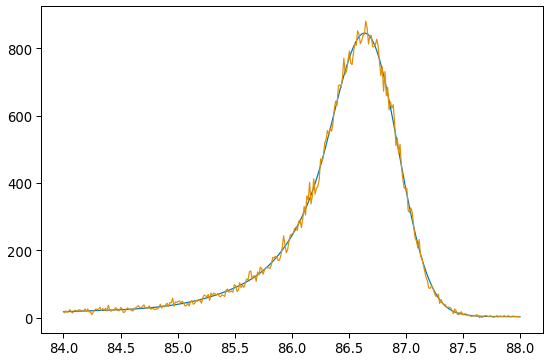

FWHM: 0.7430597579380986
[3.29492882e+02 8.66903333e+01 2.54110250e-01 1.22099806e+01
 8.66903333e+01 2.54110250e-01 9.92614574e+02 8.66903333e+01
 2.54110250e-01 2.19501830e+00 3.35898745e+00]
None


In [9]:
if grade_cut==0:
    upper=89
    lower=83
else:
    upper=87.2
    lower=83

fit_mask = (eu_spectrum[1] < upper) & (eu_spectrum[1] > lower)

line_init = models.Gaussian1D(amplitude=1600, mean=86.8, stddev=0.4) + ConstShelf(norm=60, mean=86.8, stddev=0.4) + \
    ExpTail(norm=1000, mean=86.8, stddev=0.4, slope=1.5) + models.Const1D(amplitude=20)

# line_init.amplitude_0.min = 0
line_init.stddev_1.tied=tie_stddevs
line_init.mean_1.tied = tie_means
# line_init.norm_1.min = 0
# line_init.norm_1.max = None
line_init.stddev_2.tied=tie_stddevs
line_init.mean_2.tied = tie_means
# line_init.norm_2.min = 0
# line_init.norm_2.max = None

fit_line = fitting.LevMarLSQFitter()
line = fit_line(line_init, eu_spectrum[1][fit_mask], eu_spectrum[0][fit_mask])

xs = np.linspace(84, 88, int(1e6))
spline = UnivariateSpline(xs, line(xs) - line.parameters[-1] - line(xs).max()/2)
# spline = UnivariateSpline(xs, line(xs) - line(xs).max()/2)
roots = spline.roots() # find the roots

fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize=(9,8), sharex=True, gridspec_kw={'hspace':0, 'height_ratios': [2,1]})
ax1.errorbar(eu_spectrum[1][fit_mask], eu_spectrum[0][fit_mask], yerr=np.sqrt(eu_spectrum[0][fit_mask]), fmt='', ls='')
ax1.plot(eu_spectrum[1][fit_mask], line(eu_spectrum[1][fit_mask]))

ax1.plot(eu_spectrum[1][fit_mask], line[0](eu_spectrum[1][fit_mask]), ls='dashed')
ax1.plot(eu_spectrum[1][fit_mask], line[1](eu_spectrum[1][fit_mask]), ls='dashed')
ax1.plot(eu_spectrum[1][fit_mask], line[2](eu_spectrum[1][fit_mask]), ls='dashed')
ax1.plot(eu_spectrum[1][fit_mask], line[3](eu_spectrum[1][fit_mask]), ls='dashed')
ax1.set_yscale('log')
ax1.set_ylim(ylimits)
ax1.set_ylabel('Counts')
ax1.set_xlabel('Energy (keV)')
ax1.text(lower, ylimits[1]/2, r'Source: $^{155}$Eu')
ax1.text(lower, ylimits[1]/4, 'Centroid = ' + str(round(line.parameters[1], 1)) + ' keV')
ax1.text(lower, ylimits[1]/8, 'FWHM = ' + str(int(1000*(roots[1] - roots[0]))) + ' eV')

ax2.errorbar(eu_spectrum[1][fit_mask], (eu_spectrum[0][fit_mask] - line(eu_spectrum[1][fit_mask]))/np.sqrt(eu_spectrum[0][fit_mask]),
             yerr=1.0, fmt='', ls='')
ax2.axhline(0, color='C1')
ax2.set_ylim((-5,5))
ax2.set_xlabel('Energy (keV)')
ax2.set_ylabel(r'$\chi$')
plt.savefig(plot_dir + 'Eu155_86kev_fit_grade' + str(grade_cut) + '_depthcut.pdf')
plt.close()


plt.figure(figsize=(9,6))
plt.plot(xs, spline(xs)+line(xs).max()/2 + line.parameters[-1])
plt.plot(eu_spectrum[1][np.abs(eu_spectrum[1] - 86) < 2],
         eu_spectrum[0][np.abs(eu_spectrum[1] - 86) < 2])
plt.show()
plt.close()
del xs, spline
print('FWHM: ' + str(roots[1] - roots[0]))

print(line.parameters)
print(line.stds)

### Eu155 105keV

/var/folders/bs/3q1_zdjn6b59l3mxccjw3wmm0000gn/T/ipykernel_29373/1264334765.py:50: RuntimeWarning: divide by zero encountered in true_divide
  ax2.errorbar(eu_spectrum[1][fit_mask], (eu_spectrum[0][fit_mask] - line(eu_spectrum[1][fit_mask]))/np.sqrt(eu_spectrum[0][fit_mask]),
/var/folders/bs/3q1_zdjn6b59l3mxccjw3wmm0000gn/T/ipykernel_29373/1264334765.py:59: RuntimeWarning: divide by zero encountered in true_divide
  chisq_red = np.sum(((eu_spectrum[0][fit_mask] - line(eu_spectrum[1][fit_mask])) ** 2)/\


inf
0.8189388061630609
[1.78546489e+02 1.05543880e+02 2.77629696e-01 6.89475712e+00
 1.05543880e+02 2.77629696e-01 4.39263455e+02 1.05543880e+02
 2.77629696e-01 1.87835857e+00]
None


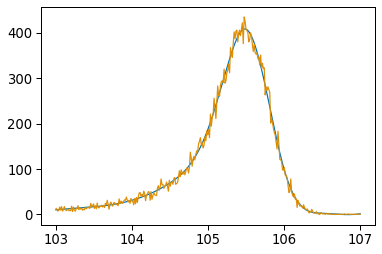

In [10]:
if grade_cut==0:
    upper=106.5
    lower=103

else:
    upper=106
    lower=103

fit_mask = (eu_spectrum[1] < upper) & (eu_spectrum[1] > lower)

line_init = models.Gaussian1D(amplitude=250, mean=105, stddev=0.2) + ConstShelf(norm=0.1, mean=105, stddev=0.4) + \
        ExpTail(norm=100, mean=105, stddev=0.4, slope=.1)# + models.Const1D(amplitude=20)


# line_init.amplitude_0.min = 0
line_init.stddev_1.tied=tie_stddevs
line_init.mean_1.tied = tie_means
# line_init.norm_1.min = 0
# line_init.norm_1.max = None
line_init.stddev_2.tied=tie_stddevs
line_init.mean_2.tied = tie_means
# line_init.norm_2.min = 0
# line_init.norm_2.max = None


fit_line = fitting.LevMarLSQFitter()
line = fit_line(line_init, eu_spectrum[1][fit_mask], eu_spectrum[0][fit_mask])

xs = np.linspace(103, 107, int(1e6))
spline = UnivariateSpline(xs,
                          line(xs) - line(xs).max()/2)
roots = spline.roots() # find the roots

fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize=(9,8), sharex=True, gridspec_kw={'hspace':0, 'height_ratios': [2,1]})
ax1.errorbar(eu_spectrum[1][fit_mask], eu_spectrum[0][fit_mask], yerr=np.sqrt(eu_spectrum[0][fit_mask]), fmt='', ls='')
ax1.plot(eu_spectrum[1][fit_mask], line(eu_spectrum[1][fit_mask]))

ax1.plot(eu_spectrum[1][fit_mask], line[0](eu_spectrum[1][fit_mask]), ls='dashed')
ax1.plot(eu_spectrum[1][fit_mask], line[1](eu_spectrum[1][fit_mask]), ls='dashed')
ax1.plot(eu_spectrum[1][fit_mask], line[2](eu_spectrum[1][fit_mask]), ls='dashed')
ax1.set_yscale('log')
ax1.set_ylim(ylimits)
ax1.set_ylabel('Counts')
ax1.set_xlabel('Energy (keV)')
ax1.text(lower, ylimits[1]/2, r'Source: $^{155}$Eu')
ax1.text(lower, ylimits[1]/4, 'Centroid = ' + str(round(line.parameters[1], 1)) + ' keV')
ax1.text(lower, ylimits[1]/8, 'FWHM = ' + str(int(1000*(roots[1] - roots[0]))) + ' eV')


ax2.errorbar(eu_spectrum[1][fit_mask], (eu_spectrum[0][fit_mask] - line(eu_spectrum[1][fit_mask]))/np.sqrt(eu_spectrum[0][fit_mask]),
             yerr=1.0, fmt='', ls='')
ax2.axhline(0, color='C1')
ax2.set_ylim((-5,5))
ax2.set_xlabel('Energy (keV)')
ax2.set_ylabel(r'$\chi$')
plt.savefig(plot_dir + 'Eu155_105kev_fit_grade' + str(grade_cut) + '_depthcut.pdf')
plt.close()

chisq_red = np.sum(((eu_spectrum[0][fit_mask] - line(eu_spectrum[1][fit_mask])) ** 2)/\
                   eu_spectrum[0][fit_mask])/len(eu_spectrum[0][fit_mask] - 7)
print(chisq_red)


plt.plot(xs, spline(xs)+line(xs).max()/2)
plt.plot(eu_spectrum[1][np.abs(eu_spectrum[1] - 105) < 2],
         eu_spectrum[0][np.abs(eu_spectrum[1] - 105) < 2])
del xs, spline
print(roots[1] - roots[0])
print(line.parameters)
print(line.stds)


### Am241 59.5keV

/var/folders/bs/3q1_zdjn6b59l3mxccjw3wmm0000gn/T/ipykernel_29373/2532751931.py:44: RuntimeWarning: divide by zero encountered in true_divide
  ax2.errorbar(am_spectrum[1][fit_mask], (am_spectrum[0][fit_mask] - line(am_spectrum[1][fit_mask]))/np.sqrt(am_spectrum[0][fit_mask]),


0.6279696441648355
[1.25111711e+02 5.95560639e+01 2.12413037e-01 2.07107047e+01
 5.95560639e+01 2.12413037e-01 1.54220310e+03 5.95560639e+01
 2.12413037e-01 3.87315754e+00]
[[ 4.72677191e+03  6.32948474e-01  1.56954631e-01 -1.52384069e+02
  -9.03685871e+03 -1.48352167e+01]
 [ 6.32948474e-01  1.29273711e-04  1.27529855e-05 -3.16777849e-02
  -1.18597474e+00 -2.51487371e-03]
 [ 1.56954631e-01  1.27529855e-05  7.59585792e-06 -3.75809464e-03
  -3.07008002e-01 -4.13291564e-04]
 [-1.52384069e+02 -3.16777849e-02 -3.75809464e-03  1.21223296e+01
   2.82428668e+02  6.50200101e-01]
 [-9.03685871e+03 -1.18597474e+00 -3.07008002e-01  2.82428668e+02
   1.73251487e+04  2.81102014e+01]
 [-1.48352167e+01 -2.51487371e-03 -4.13291564e-04  6.50200101e-01
   2.81102014e+01  5.35617905e-02]]


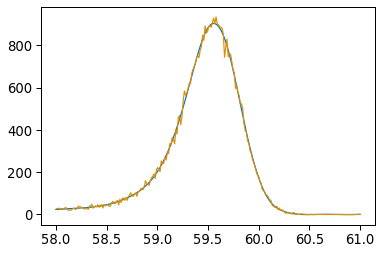

In [11]:
if grade_cut==0:
    upper= 60.5
    lower= 58
else:
    upper= 60
    lower= 58

fit_mask = (am_spectrum[1] < upper) & (am_spectrum[1] > lower)

line_init = models.Gaussian1D(amplitude=150, mean=59.6, stddev=0.22) + ConstShelf(norm=11, mean=59.5, stddev=0.2) + \
    ExpTail(norm=920, mean=59.5, stddev=0.2, slope=3.7)# + models.Const1D(amplitude=20)

# line_init = models.Gaussian1D(amplitude=500, mean=59.5, stddev=0.2) + ConstShelf(norm=10, mean=59.5, stddev=0.2)


line_init.stddev_1.tied=tie_stddevs
line_init.mean_1.tied = tie_means
line_init.stddev_2.tied=tie_stddevs
line_init.mean_2.tied = tie_means

fit_line = fitting.LevMarLSQFitter()
line = fit_line(line_init, am_spectrum[1][fit_mask], am_spectrum[0][fit_mask])

xs = np.linspace(58, 61, int(1e6))
spline = UnivariateSpline(xs,
                          line(xs) - line(xs).max()/2)
roots = spline.roots() # find the roots

fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize=(9,8), sharex=True, gridspec_kw={'hspace':0, 'height_ratios': [2,1]})
ax1.errorbar(am_spectrum[1][fit_mask], am_spectrum[0][fit_mask], yerr=np.sqrt(am_spectrum[0][fit_mask]), fmt='', ls='')
ax1.plot(am_spectrum[1][fit_mask], line(am_spectrum[1][fit_mask]))

ax1.plot(am_spectrum[1][fit_mask], line[0](am_spectrum[1][fit_mask]), ls='dashed')
ax1.plot(am_spectrum[1][fit_mask], line[1](am_spectrum[1][fit_mask]), ls='dashed')
ax1.plot(am_spectrum[1][fit_mask], line[2](am_spectrum[1][fit_mask]), ls='dashed')
ax1.set_yscale('log')
ax1.set_ylim(ylimits)
ax1.set_ylabel('Counts')
ax1.set_xlabel('Energy (keV)')
ax1.text(lower, ylimits[1]/2, r'Source: $^{241}$Am')
ax1.text(lower, ylimits[1]/4, 'Centroid = ' + str(round(line.parameters[1], 1)) + ' keV')
ax1.text(lower, ylimits[1]/8, 'FWHM = ' + str(int(1000*(roots[1] - roots[0]))) + ' eV')

ax2.errorbar(am_spectrum[1][fit_mask], (am_spectrum[0][fit_mask] - line(am_spectrum[1][fit_mask]))/np.sqrt(am_spectrum[0][fit_mask]),
             yerr=1.0, fmt='', ls='')
ax2.axhline(0, color='C1')
ax2.set_ylim((-5,5))
ax2.set_xlabel('Energy (keV)')
ax2.set_ylabel(r'$\chi$')
plt.savefig(plot_dir + 'Am241_60kev_fit_grade' + str(grade_cut) + '_depthcut.pdf')
plt.close()


# chisq_red = np.sum(((am_spectrum[0][lower:upper][zero_mask] - line(am_spectrum[1][lower:upper][zero_mask])) ** 2)/\
#                    am_spectrum[0][lower:upper][zero_mask])/len(am_spectrum[0][lower:upper][zero_mask] - 7)
# print(chisq_red)


plt.plot(xs, spline(xs)+line(xs).max()/2)
plt.plot(am_spectrum[1][np.abs(am_spectrum[1] - 59.5) < 1.5],
         am_spectrum[0][np.abs(am_spectrum[1] - 59.5) < 1.5])
del xs, spline
print(roots[1] - roots[0])
print(line.parameters)
print(fit_line.fit_info['param_cov'])


### Am241 14keV

1.1603112341483777
0.4519630959143157
[2.12043465e+02 1.39227549e+01 1.64710233e-01 3.74294109e+02
 1.39227549e+01 1.64710233e-01 3.15016685e+00 8.51040613e+00]
[[ 5.92743392e+02 -5.28941682e-02  6.68694434e-02 -1.12876113e+03
  -5.14878693e+00 -1.57393234e+01]
 [-5.28941682e-02  1.13428494e-05 -8.35997015e-06  1.02714658e-01
   3.29640401e-04  3.11302454e-04]
 [ 6.68694434e-02 -8.35997015e-06  1.08091894e-05 -1.31097568e-01
  -5.69409252e-04 -2.08242135e-03]
 [-1.12876113e+03  1.02714658e-01 -1.31097568e-01  2.17150054e+03
   9.86832268e+00  2.86765021e+01]
 [-5.14878693e+00  3.29640401e-04 -5.69409252e-04  9.86832268e+00
   4.95457747e-02  1.80718793e-01]
 [-1.57393234e+01  3.11302454e-04 -2.08242135e-03  2.86765021e+01
   1.80718793e-01  1.67885878e+00]]


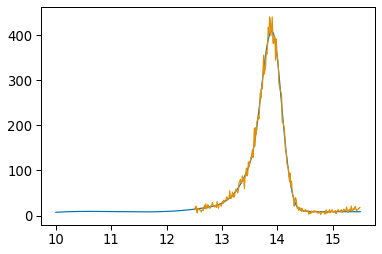

In [12]:
if grade_cut==0:
    upper = 15
    lower = 12.5
else:
    upper = 14.25
    lower = 12.5

fit_mask = (am_spectrum[1] < upper) & (am_spectrum[1] > lower)

# line_init = models.Gaussian1D(amplitude=250, mean=13.9, stddev=0.3) + ConstShelf(norm=1, mean=13.9, stddev=0.2) + models.Const1D(amplitude=20)

line_init = models.Gaussian1D(amplitude=400, mean=13.9, stddev=0.2) + \
    ExpTail(norm=250, mean=13.9, stddev=0.2, slope=3.6) + models.Const1D(amplitude=10)

line_init.stddev_1.tied=tie_stddevs
line_init.mean_1.tied = tie_means


fit_line = fitting.LevMarLSQFitter()
line = fit_line(line_init, am_spectrum[1][fit_mask], am_spectrum[0][fit_mask])


xs = np.linspace(10, 15.5, int(1e6))
spline = UnivariateSpline(xs,
                          line(xs) - line(xs).max()/2 - line.parameters[-1])
roots = spline.roots() # find the roots


fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize=(9,8), sharex=True, gridspec_kw={'hspace':0, 'height_ratios': [2,1]})
ax1.errorbar(am_spectrum[1][fit_mask], am_spectrum[0][fit_mask], yerr=np.sqrt(am_spectrum[0][fit_mask]), fmt='', ls='')
ax1.plot(am_spectrum[1][fit_mask], line(am_spectrum[1][fit_mask]))

ax1.plot(am_spectrum[1][fit_mask], line[0](am_spectrum[1][fit_mask]), ls='dashed')
ax1.plot(am_spectrum[1][fit_mask], line[1](am_spectrum[1][fit_mask]), ls='dashed')
ax1.plot(am_spectrum[1][fit_mask], line[2](am_spectrum[1][fit_mask]), ls='dashed')
ax1.set_yscale('log')
ax1.set_ylim(ylimits)
ax1.set_ylabel('Counts')
ax1.set_xlabel('Energy (keV)')
ax1.text(lower, ylimits[1]/2, r'Source: $^{241}$Am')
ax1.text(lower, ylimits[1]/4, 'Centroid = ' + str(round(line.parameters[1], 1)) + ' keV')
ax1.text(lower, ylimits[1]/8, 'FWHM = ' + str(int(1000*(roots[1] - roots[0]))) + ' eV')

ax2.errorbar(am_spectrum[1][fit_mask], (am_spectrum[0][fit_mask] - line(am_spectrum[1][fit_mask]))/np.sqrt(am_spectrum[0][fit_mask]),
             yerr=1.0, fmt='', ls='')
ax2.axhline(0, color='C1')
ax2.set_ylim((-5,5))
ax2.set_xlabel('Energy (keV)')
ax2.set_ylabel(r'$\chi$')
plt.savefig(plot_dir + 'Am241_14kev_fit_grade' + str(grade_cut) + '_depthcut.pdf')
plt.close()

chisq_red = np.sum(((am_spectrum[0][fit_mask] - line(am_spectrum[1][fit_mask])) ** 2)/\
                   am_spectrum[0][fit_mask])/len(am_spectrum[0][fit_mask] - 7)
print(chisq_red)

xs = np.linspace(10, 15.5, int(1e6))
spline = UnivariateSpline(xs,
                          line(xs) - line(xs).max()/2 - line.parameters[-1])
roots = spline.roots() # find the roots
plt.plot(xs, spline(xs)+line(xs).max()/2 + line.parameters[-1])
plt.plot(am_spectrum[1][np.abs(am_spectrum[1] - 14) < 1.5],
         am_spectrum[0][np.abs(am_spectrum[1] - 14) < 1.5])
del xs, spline
print(roots[1] - roots[0])
print(line.parameters)
print(fit_line.fit_info['param_cov'])


# Charge cloud investigation

In [24]:
grade_cut = 4
am_spectrum, am_energies, am_depths = Am241_flood.gen_spectrum(gain=full_gain, sw_thresh=55, grade_cut=grade_cut, exclude_edges=True, depth_plot=True)
eu_spectrum, eu_energies, eu_depths = Eu155_flood.gen_spectrum(gain=full_gain, sw_thresh=55, grade_cut=grade_cut, exclude_edges=True, depth_plot=True)

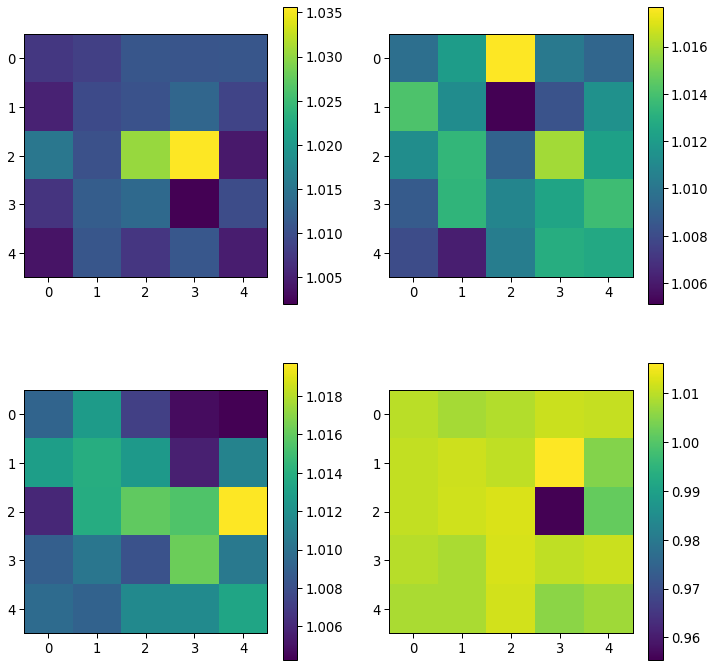

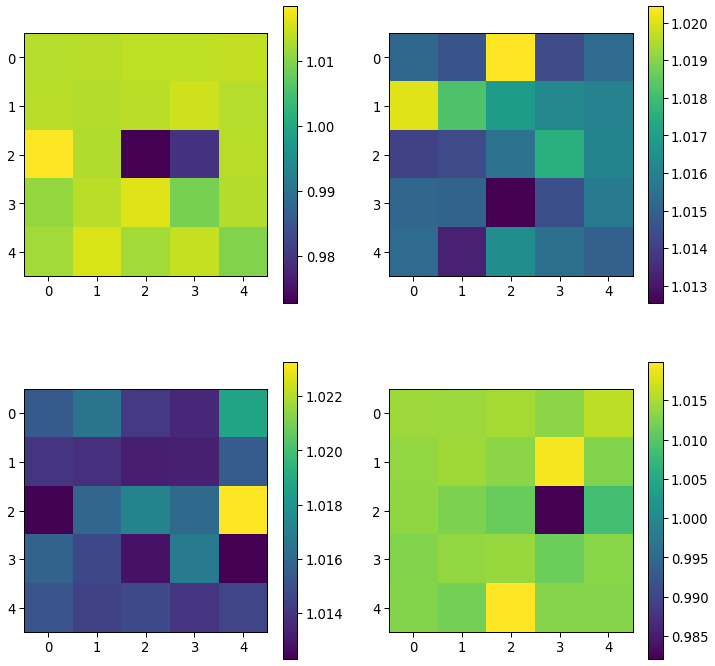

In [50]:
fig, axes = plt.subplots(figsize=(12,12), nrows=2, ncols=2)
grades = np.array([[1,2],[3,4]])
for i in range(2):
    for j in range(2):
        im = axes[i][j].imshow(Am241_flood.grade_gain[grades[i][j]])
        fig.colorbar(im, ax=axes[i][j])
        
fig, axes = plt.subplots(figsize=(12,12), nrows=2, ncols=2)
grades = np.array([[1,2],[3,4]])
for i in range(2):
    for j in range(2):
        im = axes[i][j].imshow(Eu155_flood.grade_gain[grades[i][j]])
        fig.colorbar(im, ax=axes[i][j])
        


[-1.e-01 -1.e-02 -1.e-03 -1.e-04 -1.e-05]


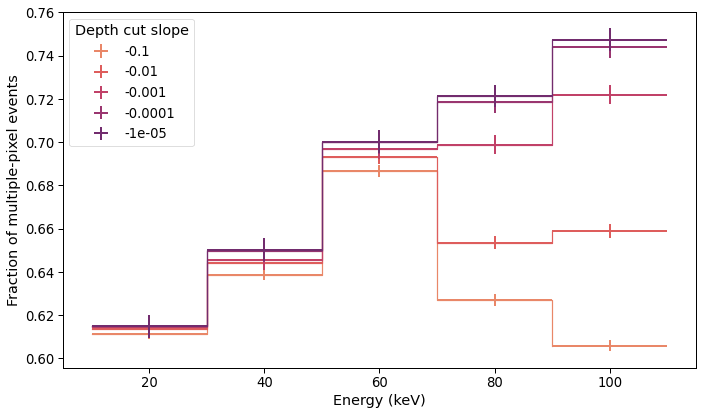

In [15]:
no_edge_mask_am = (Am241_flood.raw_data_1d.loc[:, 'RAWY'] > Am241_flood._row_iter[0]) & (Am241_flood.raw_data_1d.loc[:, 'RAWY'] < Am241_flood._row_iter[-1]) & (Am241_flood.raw_data_1d.loc[:, 'RAWX'] > Am241_flood._col_iter[0]) & (Am241_flood.raw_data_1d.loc[:, 'RAWX'] < Am241_flood._col_iter[-1])
one_pix_mask_am = (Am241_flood.raw_data_1d.loc[:, 'GRADE']==0)
multi_pix_mask_am = (Am241_flood.raw_data_1d.loc[:, 'GRADE'] >= 1) & (Am241_flood.raw_data_1d.loc[:, 'GRADE'] <=31)
no_edge_mask_eu = (Eu155_flood.raw_data_1d.loc[:, 'RAWY'] > Eu155_flood._row_iter[0]) & (Eu155_flood.raw_data_1d.loc[:, 'RAWY'] < Eu155_flood._row_iter[-1]) & (Eu155_flood.raw_data_1d.loc[:, 'RAWX'] > Eu155_flood._col_iter[0]) & (Eu155_flood.raw_data_1d.loc[:, 'RAWX'] < Eu155_flood._col_iter[-1])
one_pix_mask_eu = (Eu155_flood.raw_data_1d.loc[:, 'GRADE']==0)
multi_pix_mask_eu = (Eu155_flood.raw_data_1d.loc[:, 'GRADE'] >= 1) & (Eu155_flood.raw_data_1d.loc[:, 'GRADE'] <= 31)

# depth_cut_list = [-0.1, -0.05, -0.025, -0.01, -0.005, -0.0025, -0.001, -0.0005, -0.00001]
depth_cut_list = -np.array([10 ** -(i+1) for i in range(5)])
print(depth_cut_list)
# bin_edges = np.array([10+(20*i) for i in range(6)])
bin_edges = np.array([10+(20*i) for i in range(6)])

sns.set_palette('flare', len(depth_cut_list))
plt.figure(figsize=(10,6))

for j, depth_cut in enumerate(depth_cut_list):
    depth_mask_am = nudetect.PI_to_keV(Am241_flood.raw_data_1d['PH_SUBTH'])/nudetect.PI_to_keV(Am241_flood.raw_data_1d['PI']) >= depth_cut
    depth_mask_eu = nudetect.PI_to_keV(Eu155_flood.raw_data_1d['PH_SUBTH'])/nudetect.PI_to_keV(Eu155_flood.raw_data_1d['PI']) >= depth_cut

    bin_ratio = np.array([0.0 for i in range(len(bin_edges)-1)])
    ratio_err = np.array([0.0 for i in range(len(bin_edges)-1)])
    for i in range(len(bin_edges)-1):
        bin_mask_am = (nudetect.PI_to_keV(Am241_flood.raw_data_1d['PI']) >= bin_edges[i]) & (nudetect.PI_to_keV(Am241_flood.raw_data_1d['PI']) < bin_edges[i+1])
        bin_mask_eu = (nudetect.PI_to_keV(Eu155_flood.raw_data_1d['PI']) >= bin_edges[i]) & (nudetect.PI_to_keV(Eu155_flood.raw_data_1d['PI']) < bin_edges[i+1])
        temp_num = float(np.sum(no_edge_mask_am & multi_pix_mask_am & bin_mask_am & depth_mask_am)) + float(np.sum(no_edge_mask_eu & multi_pix_mask_eu & bin_mask_eu & depth_mask_eu))
        temp_denom = float(np.sum(no_edge_mask_am & one_pix_mask_am & bin_mask_am & depth_mask_am)) + float(np.sum(no_edge_mask_eu & one_pix_mask_eu & bin_mask_eu & depth_mask_eu)) + temp_num
        bin_ratio[i] = temp_num/temp_denom
        ratio_err = np.sqrt(temp_num*(1.0 + (temp_num/temp_denom)))/temp_denom

    plt.errorbar((bin_edges[1:] + bin_edges[:-1])/2, bin_ratio, xerr=(bin_edges[1:] - bin_edges[:-1])/2, yerr=ratio_err, ls='', lw=2.0, label = str(depth_cut), color = 'C'+str(j))
    plt.step(bin_edges[:-1], bin_ratio, where='post', color = 'C'+str(j))
    
plt.xlabel('Energy (keV)')
plt.ylabel('Fraction of multiple-pixel events')
plt.legend(title='Depth cut slope', loc=2)
plt.tight_layout()
plt.savefig(plot_dir + 'multipix_fraction_depth.pdf')


## Estimating charge cloud size with energy:

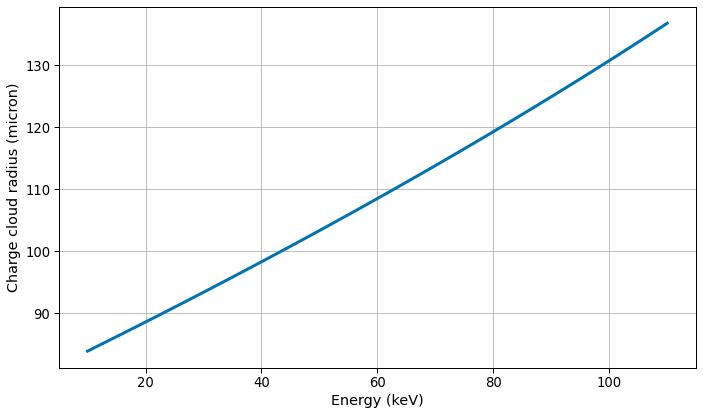

In [101]:
# See notes for calculation. Very simple version:

sns.set_palette('colorblind')
E_cloud = np.linspace(10,110,1000)
r_cloud = 600*(0.5-np.sqrt((0.425-1.75*(E_cloud/1e3))/np.pi))
plt.figure(figsize=(10,6))
plt.plot(E_cloud, r_cloud, lw=3.0)
plt.xlabel('Energy (keV)')
plt.ylabel('Charge cloud radius (micron)')
plt.grid()
# plt.yscale('log')
plt.tight_layout()
plt.savefig(plot_dir + 'cloud_radius.pdf')



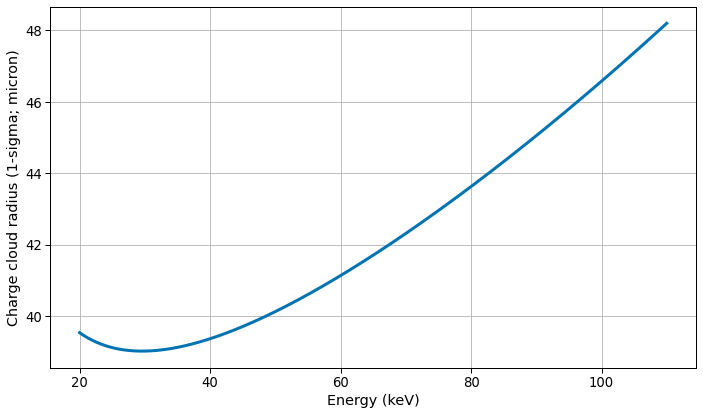

In [7]:
pixel_pitch = 600
E_cloud = np.linspace(20,110,1000)
E_thresh = 0.5

# r_0 calculated from the slope of fraction of multiple pixel to energy.
r_0 = pixel_pitch*np.sqrt((0.425-1.75*(E_cloud/1e3))/np.pi)
rsigma = ((pixel_pitch/2) - r_0)/(np.sqrt(2)*scipy.special.erfinv(1.0-(E_thresh/E_cloud)))

plt.figure(figsize=(10,6))
plt.plot(E_cloud, rsigma, lw=3.0)
plt.xlabel('Energy (keV)')
plt.ylabel('Charge cloud radius (1-sigma; micron)')
plt.grid()
# plt.yscale('log')
plt.tight_layout()
plt.savefig(plot_dir + 'cloud_radius_sigma.pdf')

